# Data building

This notebook downloads three datasets from kaggle which are:

1. [bone age](https://www.kaggle.com/datasets/kmader/rsna-bone-age)
2. [chest scan](https://www.kaggle.com/datasets/maedemaftouni/large-covid19-ct-slice-dataset)
3. [Brain MRI](https://www.kaggle.com/datasets/mateuszbuda/lgg-mri-segmentation)

Then 1000 images are randomly selcted from the datasets and put into a directory representing their label i.e. a bone image, brain sacan or a chest scan then they are zipped and put into Google Drive for future use
and as a verification after the conversion the data will be downloaded from Google Drive, extracted and loaded into PyTorch `DataLoader` just to verify that it's working    

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!rm -rf kaggle.json
!kaggle datasets download -d kmader/rsna-bone-age
!kaggle datasets download -d mateuszbuda/lgg-mri-segmentation
!kaggle datasets download -d mohamedhanyyy/chest-ctscan-images


Saving kaggle.json to kaggle.json
100% 9.28G/9.29G [01:50<00:00, 149MB/s]
100% 9.29G/9.29G [01:50<00:00, 90.1MB/s]
 99% 708M/714M [00:07<00:00, 130MB/s]
100% 714M/714M [00:07<00:00, 105MB/s]
 87% 103M/119M [00:01<00:00, 122MB/s]  
100% 119M/119M [00:01<00:00, 105MB/s]


In [ ]:
!kaggle datasets download -d maedemaftouni/large-covid19-ct-slice-dataset

 99% 2.05G/2.06G [00:32<00:00, 73.0MB/s]
100% 2.06G/2.06G [00:32<00:00, 68.6MB/s]


In [58]:
!unzip  lgg-mri-segmentation.zip


Streaming output truncated to the last 5000 lines.
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7294_19890104/TCGA_DU_7294_19890104_9_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_1.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_10.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_10_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_11.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_11_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_12.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_12_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_13.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_1

In [59]:
from pathlib import Path
pth = Path("/content/kaggle_3m")
# img_lst_jpg = list(pth.glob("*/*/*.jpg"))
# img_lst_png = list(pth.glob("*/*.png"))
# img_lst = img_lst_png+img_lst_jpg
img_lst = list(pth.glob("*/*.tif"))
len(img_lst)

7858

In [ ]:
len(img_lst)==(7858//2)

True

In [ ]:
str(img_lst[0]).endswith("mask.tif")

True

In [ ]:
str(img_lst[-1]).split("/")

['', 'content', 'curated_data', 'curated_data', '2COVID', 'P018_129.png']

In [64]:
j=0
for i,img in enumerate(img_lst):
    if "mask" in str(img):
        j+=1
        img_lst.pop(i)
print(f"deleted {j} images")

deleted 0 images


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def plot_images(img_lst):
    for i in range(9):
        plt.subplot(3,3,i+1)
        random_idx = np.random.randint(0,len(img_lst))
        title = str(img_lst[random_idx]).split("/")[-2]
        im = Image.open(str(img_lst[random_idx]))
        plt.title(title)
        plt.imshow(im,cmap="gray")


In [ ]:
mri_pth = Path("/content/mri")
len()

1000

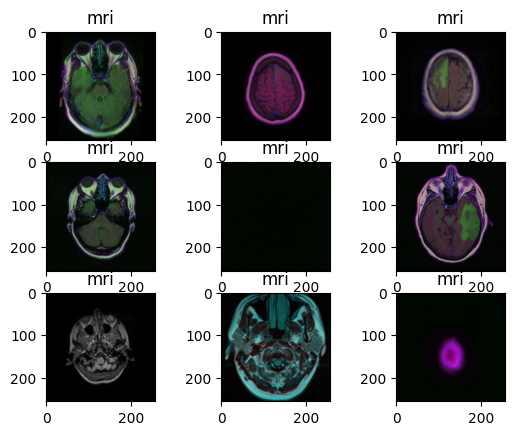

In [ ]:
plot_images(list(mri_pth.glob("*.tif")))

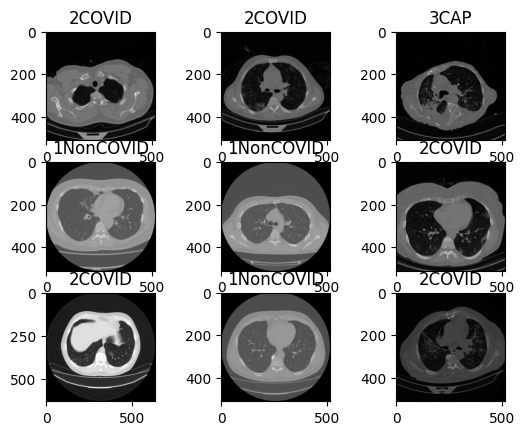

In [ ]:
plot_images(img_lst)

In [ ]:
type(img_lst[0])

pathlib.PosixPath

In [ ]:
from typing import List
import pathlib
import shutil
def copy_images(dist:pathlib.PosixPath,img_lst:List[pathlib.PosixPath],
                num_samples:int=1000)->None:
    """
    Copies randomly sampled images to the dist directory

    Args:
        dist a posix path: the destination directory
        img_lst a List of posix path(s): a list full of
        num_samples: the number of samples to be copied from the source to the destination
    """
    if not dist.is_dir():
        dist.mkdir(parents=True)

    selected_images = np.random.choice(img_lst,size=num_samples, replace=False)
    for image in selected_images:
        shutil.copy(image,dist)

In [67]:
copy_images(Path("/content/valid/mri/"),img_lst,100)

In [46]:
img_lst[-1]

PosixPath('/content/curated_data/curated_data/2COVID/P018_129.png')

In [ ]:
dist

PosixPath('/content/chest')

In [ ]:
!rm -rf chest

In [69]:
import os
for dir, subdir, files in os.walk("/content/train/"):
    print(f"{dir} {len(files)}")

/content/train/ 0
/content/train/bone 1000
/content/train/mri 1000
/content/train/chest 1000


In [68]:
!zip -r potato.zip train test valid


  adding: train/ (stored 0%)
  adding: train/bone/ (stored 0%)
  adding: train/bone/1436.png (deflated 0%)
  adding: train/bone/11677.png (deflated 0%)
  adding: train/bone/7883.png (deflated 0%)
  adding: train/bone/7295.png (deflated 0%)
  adding: train/bone/14109.png (deflated 0%)
  adding: train/bone/11574.png (deflated 0%)
  adding: train/bone/15107.png (deflated 0%)
  adding: train/bone/14285.png (deflated 0%)
  adding: train/bone/9157.png (deflated 0%)
  adding: train/bone/10960.png (deflated 0%)
  adding: train/bone/2373.png (deflated 0%)
  adding: train/bone/3567.png (deflated 0%)
  adding: train/bone/2298.png (deflated 0%)
  adding: train/bone/11539.png (deflated 0%)
  adding: train/bone/2819.png (deflated 0%)
  adding: train/bone/13546.png (deflated 0%)
  adding: train/bone/10685.png (deflated 0%)
  adding: train/bone/3654.png (deflated 0%)
  adding: train/bone/14712.png (deflated 0%)
  adding: train/bone/5273.png (deflated 0%)
  adding: train/bone/6981.png (deflated 0%)
  a

In [70]:
!cp potato.zip /content/drive/MyDrive/Bustati